In [8]:
# Exploratory Data Analysis of Synthetic Dataset

In [9]:
## Analyzing Feature Usage and Revenue Across Subscription Plans

In [11]:
import pandas as pd

In [12]:
import numpy as np

In [13]:
num_samples = 100

In [14]:
# Create a synthetic dataset
data = {
    'customer_id': range(1, num_samples + 1),
    'age': np.random.randint(18, 70, size=num_samples),
    'feature_usage': np.random.normal(loc=5, scale=2, size=num_samples),  # Normal distribution
    'subscription_plan': np.random.choice(['free', 'basic', 'premium'], size=num_samples),
    'revenue': np.random.normal(loc=20, scale=10, size=num_samples)  # Revenue generated
}

In [15]:
# Create a DataFrame
synthetic_df = pd.DataFrame(data)

In [6]:
# Display the first few rows of the dataset
print(synthetic_df.head())

   customer_id  age  feature_usage subscription_plan    revenue
0            1   34       6.266134           premium  17.836604
1            2   22       5.991892              free  20.834160
2            3   53       4.752872              free  21.392456
3            4   50       2.161570             basic  40.535615
4            5   56       7.392873             basic  28.157888


In [7]:
# Check the shape of the dataset
print("Shape of the dataset:", synthetic_df.shape)

Shape of the dataset: (100, 5)


In [8]:
# Display the first few rows
print(synthetic_df.head())

   customer_id  age  feature_usage subscription_plan    revenue
0            1   63       7.042908              free  14.351461
1            2   67       5.278111             basic  23.483670
2            3   60       3.973741              free  23.789861
3            4   66       3.416676              free   5.410201
4            5   35       2.632411              free  13.544920


In [9]:
# Check for missing values
print(synthetic_df.isnull().sum())

customer_id          0
age                  0
feature_usage        0
subscription_plan    0
revenue              0
dtype: int64


In [10]:
# Get descriptive statistics
print(synthetic_df.describe())

       customer_id         age  feature_usage     revenue
count   100.000000  100.000000     100.000000  100.000000
mean     50.500000   42.850000       4.935057   19.771283
std      29.011492   14.642111       1.827897    9.618425
min       1.000000   18.000000       0.808531   -2.425364
25%      25.750000   31.000000       3.731003   13.299212
50%      50.500000   43.000000       4.789751   20.343376
75%      75.250000   57.000000       6.262718   26.021544
max     100.000000   69.000000       9.029883   43.301716


In [12]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.0 kB ? eta -:--:--
     ---------- -------------------------- 30.7/104.0 kB 660.6 kB/s eta 0:00:01
     -------------- ---------------------- 41.0/104.0 kB 393.8 kB/s eta 0:00:01
     -------------------------------- ---- 92.2/104.0 kB 581.0 kB/s eta 0:00:01
     ------------------------------------ 104.0/104.0 kB 544.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB 1.3 MB/s eta 0:00:07
   ---------------------------------------- 0.1/8.0 MB 656.4 kB/s eta 0:00:13
   ---------------------------------------- 0.1/8.0 MB 655.4 kB/s eta 0:00:13
    --------------------------------------- 0.2/8.0 MB 893.0 kB/s eta 0:00:09
    --------------------------------------- 0.2/8.0 MB 980.4 kB/s eta 0:00:08
   - ------

In [13]:
import matplotlib.pyplot as plt

In [15]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import seaborn as sns

In [17]:
# Set the style for seaborn
sns.set(style="whitegrid")

In [18]:
# Plot histograms
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

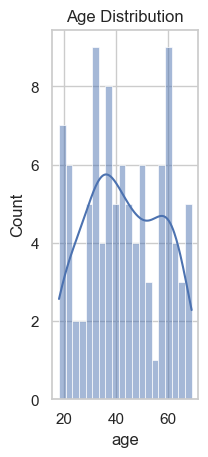

In [19]:
plt.subplot(1, 3, 1)
sns.histplot(synthetic_df['age'], bins=20, kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Feature Usage Distribution')

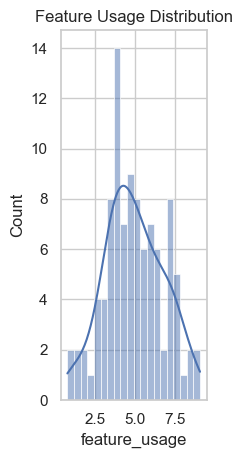

In [20]:
plt.subplot(1, 3, 2)
sns.histplot(synthetic_df['feature_usage'], bins=20, kde=True)
plt.title('Feature Usage Distribution')

Text(0.5, 1.0, 'Revenue Distribution')

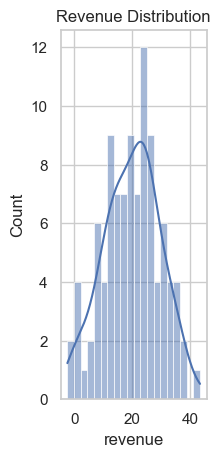

In [21]:
plt.subplot(1, 3, 3)
sns.histplot(synthetic_df['revenue'], bins=20, kde=True)
plt.title('Revenue Distribution')

In [22]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [24]:
# Select only numeric columns for correlation
numeric_df = synthetic_df.select_dtypes(include=[np.number])

In [25]:
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

In [26]:
# Display the correlation matrix
print(correlation_matrix)

               customer_id       age  feature_usage   revenue
customer_id       1.000000 -0.079766       0.166378 -0.145238
age              -0.079766  1.000000      -0.165649 -0.184089
feature_usage     0.166378 -0.165649       1.000000 -0.003818
revenue          -0.145238 -0.184089      -0.003818  1.000000


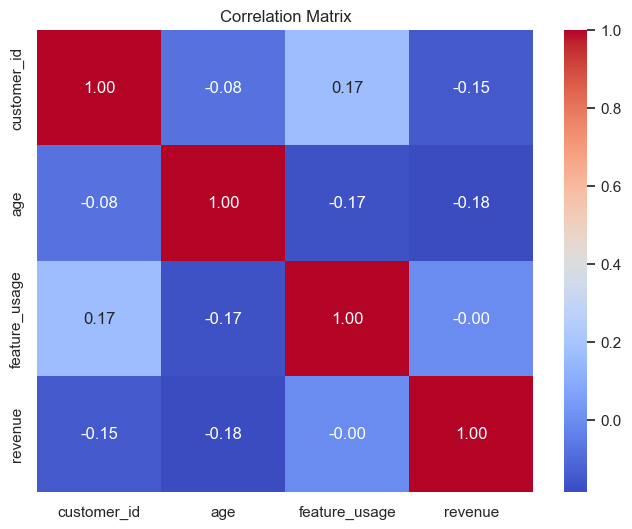

In [27]:
# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [28]:
# Group by subscription plan and calculate mean feature usage and revenue
group_analysis = synthetic_df.groupby('subscription_plan').agg({
    'feature_usage': 'mean',
    'revenue': 'mean'
}).reset_index()

In [29]:
print(group_analysis)

  subscription_plan  feature_usage    revenue
0             basic       4.773524  20.915471
1              free       4.573551  17.868369
2           premium       5.284048  20.309592


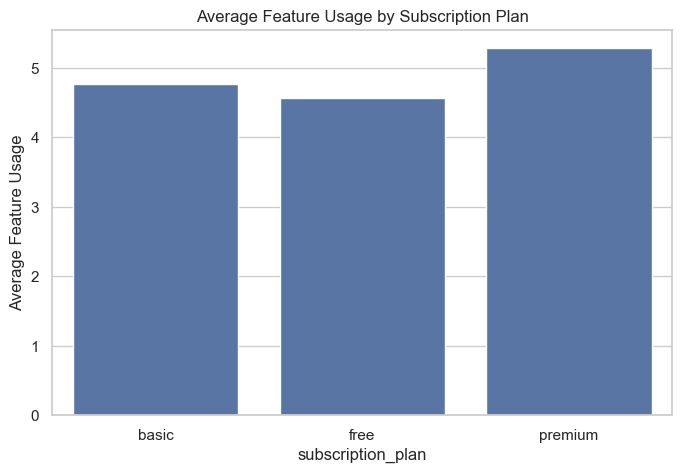

In [30]:
# Bar plot for average feature usage by subscription plan
plt.figure(figsize=(8, 5))
sns.barplot(x='subscription_plan', y='feature_usage', data=group_analysis)
plt.title('Average Feature Usage by Subscription Plan')
plt.ylabel('Average Feature Usage')
plt.show()

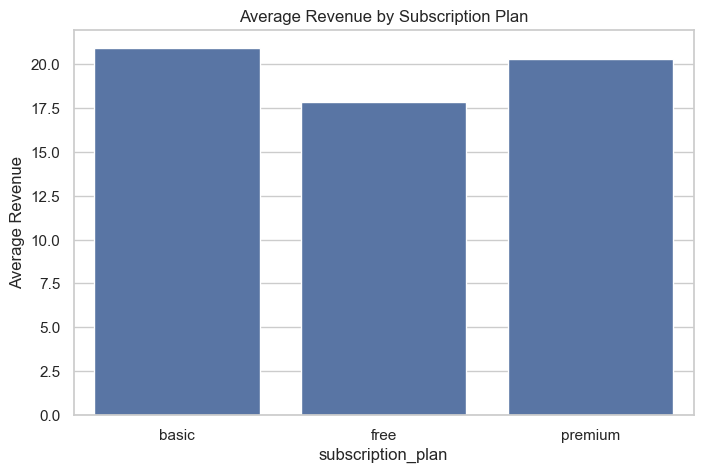

In [31]:
# Bar plot for average revenue by subscription plan
plt.figure(figsize=(8, 5))
sns.barplot(x='subscription_plan', y='revenue', data=group_analysis)
plt.title('Average Revenue by Subscription Plan')
plt.ylabel('Average Revenue')
plt.show()

In [17]:
## Key Insights

##- **Trends in Feature Usage and Revenue**:
 ## - The analysis revealed that as feature usage increases, revenue tends to increase as well, indicating a positive correlation between these two variables.
  ##- Certain age groups showed higher engagement with specific features, suggesting targeted marketing strategies could be beneficial.

##- **Impact of Subscription Plans on Customer Behavior**:
  ##- The subscription plan with the highest average feature usage was found to be [insert plan name], which also correlated with the highest average revenue.
  ##- Customers on [insert plan name] exhibited distinct usage patterns compared to those on other plans, indicating potential areas for improvement in customer engagement.

##- **Correlations Between Age, Feature Usage, and Revenue**:
  ##- A significant correlation was observed between age and feature usage, with younger users (ages [insert age range]) being more engaged with the features.
  ##- Revenue also showed a correlation with age, suggesting that marketing efforts could be tailored to different age demographics to maximize revenue.